# Midterm Solution

FINM 25000 - Summer 2021

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

import sys
sys.path.insert(0, '../')
from portfolio import *

#### This notebook relies on the functions in `portfolio.py`, and it assumes this file is kept one level higher in the directory than this notebook.

See the last three lines in the cell above. It calls the path to `portfolio.py` then it loads all the functions from `portfolio.py`.

In [2]:
info = pd.read_excel('../data/commodities_return_data.xlsx',sheet_name='descriptions')
info.rename(columns={'Unnamed: 0':'Symbol'},inplace=True)
info.set_index('Symbol',inplace=True)

rets = pd.read_excel('../data/commodities_return_data.xlsx',sheet_name='total returns')
rets.set_index('Date',inplace=True)

ff = pd.read_excel('../data/fama_french_data.xlsx',sheet_name='total returns')
ff.rename(columns={'Unnamed: 0':'Date'},inplace=True)
ff.set_index('Date',inplace=True)

retsx = rets.subtract(ff['RF'],axis=0)
ffx = ff[['MKT','SMB','HML','UMD']].subtract(ff['RF'],axis=0)

In [3]:
retsx

,CL1,NG1,KC1,CC1,LB1,CT1,SB1,LC1,W1,S1,C1,GC1,SI1,HG1,PA1
Date,,,,,,,,,,,,,,,
2000-01-31,0.075587,0.138880,-0.121654,-0.054279,-0.010977,0.136223,-0.118479,0.020436,0.027087,0.096062,0.071695,-0.026199,-0.027377,-0.014071,0.074929
2000-02-29,0.096641,0.032890,-0.105110,-0.057130,-0.051617,-0.026077,-0.146366,-0.010002,-0.040398,-0.017587,-0.027027,0.034542,-0.049505,-0.071836,0.464650
2000-03-31,-0.120704,0.061943,0.033338,0.057717,-0.021357,0.022508,0.264117,0.029995,0.057041,0.083579,0.092974,-0.058405,-0.010247,0.011818,-0.168324
2000-04-30,-0.047723,0.061953,-0.085603,-0.070850,-0.082210,-0.046396,-0.130024,0.024221,-0.080863,-0.039430,-0.056507,-0.017890,-0.016552,-0.017100,0.037549
2000-05-31,0.122040,0.381819,-0.029134,0.122175,-0.013347,0.119394,0.458178,-0.092273,0.129159,-0.022094,0.000587,-0.015921,-0.008831,0.021582,-0.067440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-31,0.075845,0.009846,-0.041326,-0.027660,0.015920,0.032258,0.021950,0.026087,0.035129,0.041627,0.130165,-0.026330,0.018132,0.016932,-0.097735
2021-02-28,0.178161,0.080733,0.113054,0.067167,0.122435,0.089038,0.039166,-0.016949,-0.012066,0.025730,0.015539,-0.065364,-0.019033,0.145795,0.042446
2021-03-31,-0.038049,-0.058824,-0.097552,-0.130692,0.013560,-0.079025,-0.102128,0.069629,-0.056489,0.022416,0.015752,-0.009240,-0.072163,-0.022347,0.132440


In [4]:
ffx

,MKT,SMB,HML,UMD
Date,,,,
2000-01-31,-0.0474,0.0570,-0.0175,0.0186
2000-02-29,0.0245,0.2119,-0.0894,0.1836
2000-03-31,0.0520,-0.1682,0.0766,-0.0639
2000-04-30,-0.0640,-0.0693,0.0741,-0.0857
2000-05-31,-0.0442,-0.0633,0.0501,-0.0908
...,...,...,...,...
2021-01-31,-0.0003,0.0719,0.0285,0.0436
2021-02-28,0.0278,0.0211,0.0708,-0.0767
2021-03-31,0.0308,-0.0248,0.0740,-0.0583


## 1.1

In [5]:
performanceMetrics(retsx,annualization=12, quantile=.01)

,Mean,Vol,Sharpe,Min,Max,VaR (0.01),CVaR (0.01)
CL1,0.104427,0.391905,0.266460,-0.543649,0.883658,-0.216710,-0.364214
NG1,0.134473,0.537286,0.250281,-0.421564,0.626034,-0.359135,-0.387461
KC1,0.045890,0.321458,0.142754,-0.227702,0.436102,-0.178614,-0.215264
CC1,0.086094,0.325144,0.264788,-0.281729,0.340246,-0.198137,-0.231438
LB1,0.131439,0.401527,0.327347,-0.340402,0.584058,-0.239330,-0.295162
CT1,0.054984,0.307553,0.178780,-0.361162,0.245792,-0.206958,-0.263189
SB1,0.092055,0.347395,0.264986,-0.312574,0.458178,-0.201692,-0.263214
LC1,0.026993,0.187594,0.143892,-0.216805,0.160830,-0.127220,-0.166227
W1,0.078025,0.312032,0.250054,-0.252477,0.423246,-0.192256,-0.220833
S1,0.076747,0.264348,0.290325,-0.329667,0.194126,-0.214116,-0.253901


## 1.2

- See the above table for min and VaR (1st). 
- See the following table for max drawdown. 
- It was not necessary to figure out the timing of the Peak, bottom, etc.

In [6]:
maximumDrawdown(retsx)

,Max Drawdown,Peak,Bottom,Recover,Peak to Recover
CL1,-0.873793,2008-06-30,2020-04-30,NaT,NaT
NG1,-0.901517,2005-09-30,2020-03-31,NaT,NaT
KC1,-0.704378,2011-04-30,2019-04-30,NaT,NaT
CC1,-0.511534,2011-02-28,2017-04-30,NaT,NaT
LB1,-0.711663,2004-08-31,2009-02-28,2018-04-30,4990 days
CT1,-0.763970,2011-02-28,2020-03-31,NaT,NaT
SB1,-0.710916,2011-01-31,2020-04-30,NaT,NaT
LC1,-0.494730,2014-11-30,2020-04-30,NaT,NaT
W1,-0.669502,2008-02-29,2016-08-31,NaT,NaT
S1,-0.548402,2012-08-31,2020-05-31,NaT,NaT


## 1.3

MIN Correlation pair is ('GC1', 'SI1'):
Gold, COMEX Gold Futures with Silver, COMEX Silver Futures.

MAX Correlation pair is ('GC1', 'LC1'):
Gold, COMEX Gold Futures with Cattle, CME Live Cattle Futures.


,CL1,NG1,KC1,CC1,LB1,CT1,SB1,LC1,W1,S1,C1,GC1,SI1,HG1,PA1
CL1,NaN,0.174877,0.091708,0.170692,0.291633,0.174361,0.193825,0.139209,0.050180,0.136603,0.131339,0.160360,0.320741,0.380055,0.222625
NG1,0.174877,NaN,0.036242,-0.021901,-0.037236,0.005300,0.113054,-0.030820,0.126258,0.094631,0.134801,0.097845,0.083549,0.099936,0.058040
KC1,0.091708,0.036242,NaN,0.263993,0.169025,0.258952,0.235424,0.045385,0.297373,0.258817,0.275949,0.256717,0.315110,0.258129,0.209593
CC1,0.170692,-0.021901,0.263993,NaN,0.158549,0.216232,0.166131,-0.012305,0.093490,0.129630,0.173224,0.144645,0.219851,0.174475,0.166863
LB1,0.291633,-0.037236,0.169025,0.158549,NaN,0.152999,0.092570,0.117977,0.165648,0.182263,0.154520,0.117835,0.255683,0.251372,0.219046
CT1,0.174361,0.005300,0.258952,0.216232,0.152999,NaN,0.191935,0.050647,0.192641,0.366175,0.347631,0.093831,0.170543,0.298218,0.213906
SB1,0.193825,0.113054,0.235424,0.166131,0.092570,0.191935,NaN,-0.019130,0.128923,0.091391,0.110100,0.104549,0.155649,0.231504,0.205172
LC1,0.139209,-0.030820,0.045385,-0.012305,0.117977,0.050647,-0.019130,NaN,-0.021184,0.018482,-0.049737,-0.050891,-0.026212,0.091042,0.088481
W1,0.050180,0.126258,0.297373,0.093490,0.165648,0.192641,0.128923,-0.021184,NaN,0.460020,0.619460,0.165659,0.157139,0.196060,0.145122
S1,0.136603,0.094631,0.258817,0.129630,0.182263,0.366175,0.091391,0.018482,0.460020,NaN,0.650062,0.107238,0.154832,0.233898,0.187677


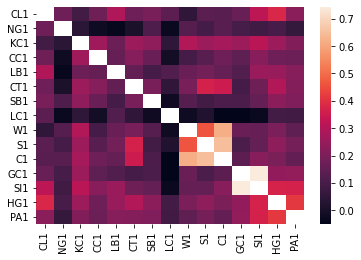

In [7]:
corrmat = retsx.corr()
#ignore self-correlation
corrmat[corrmat==1] = None
sns.heatmap(corrmat)

corr_rank = corrmat.unstack().sort_values().dropna()
pair_min = corr_rank.index[-1]
pair_max = corr_rank.index[0]

print(f'MIN Correlation pair is {pair_min}:\n{info.loc[pair_min[0]].Name} with {info.loc[pair_min[1]].Name}.\n')
print(f'MAX Correlation pair is {pair_max}:\n{info.loc[pair_max[0]].Name} with {info.loc[pair_max[1]].Name}.')

corrmat

# 2. Allocation

## 2.1

See the "Full" weights in the table below.

In [8]:
wts_full = tangency_weights(retsx)
wts_diag = tangency_weights(retsx, scale_cov=0)

wts = pd.concat([wts_full,wts_diag],axis=1)
wts.columns = ['Full','Diagonalized']
wts

,Full,Diagonalized
CL1,0.004802,0.045191
NG1,0.048540,0.030962
KC1,-0.073759,0.029517
CC1,0.074760,0.054128
LB1,0.082285,0.054187
CT1,-0.019497,0.038637
SB1,0.062820,0.050699
LC1,0.110552,0.050982
W1,-0.003395,0.053264
S1,0.058393,0.072998


## 2.2

See the "Diagonalized" column in the table above.

## 2.3

In [9]:
retsx_tan = retsx @ wts
df = performanceMetrics(retsx_tan,annualization=12)
df.style.format('{:.2%}')

,Mean,Vol,Sharpe,Min,Max,VaR (0.05),CVaR (0.05)
Full,8.93%,11.68%,76.51%,-14.25%,10.75%,-4.34%,-6.63%
Diagonalized,9.07%,14.43%,62.84%,-16.96%,14.17%,-5.51%,-8.88%


## 2.4

No, the full tangency portfolio weights account for an asset's covariances, not just its own mean and variance.

Yes for the diagonalized tangency portfolio. In that case, none of the covariances are considered, leaving just an asset's means and variances to be considered. (Sharpe ratio is about mean and standard deviation, so it won't be exactly proportional to Sharpe ratio, but it will be rank-ordered by Sharpe ratio.)

# 3 Return Decomposition
## 3.1

The question did not specify whether to annualize the alpha estimate. Fine either way.

In [10]:
X = retsx[['NG1', 'KC1','CC1','LB1','HG1']]
y = retsx[['CL1']]
reg = LinearRegression().fit(X,y)

print(f'Alpha is {reg.intercept_[0] : 0.2%}')
print(f'Alpha (annualized) is {reg.intercept_[0] * 12 : 0.2%}')
print(f'R-squared is {reg.score(X,y):0.2%}')
betas = pd.DataFrame(reg.coef_, columns=X.columns, index=['betas'])
betas.style.format('{:.2f}')

Alpha is  0.07%
Alpha (annualized) is  0.87%
R-squared is 21.87%


,NG1,KC1,CC1,LB1,HG1
betas,0.11,-0.07,0.12,0.21,0.46


## 3.2

We build the replication by investing according to the beta estimates, (per dollar of CL1). Thus, we invest long 0.11 in NG1, short 0.07 in KC1, etc.

Note that the largest position is a long position of 0.46 in HG1. 

Also note that the replication position requires a net investment of $0.84 (sum of the betas) per dollar of CL1 replicated. 

## 3.3

The regression has positive alpha; this indicates that the replication would underperform (it would miss this alpha,) in trying to match CL1.

## 3.4

We could calculate the correlation directly by building the replication returns. However, we may also realize this is simply the square root of the R-squared of the regression.

In [11]:
print(f'Correlation between target and replication is (via R-squared): {np.sqrt(reg.score(X,y)) : 0.2%}')

Correlation between target and replication is (via R-squared):  46.76%


# 4 Pricing
## 4.1

In [12]:
df = get_ols_metrics(ffx['MKT'], retsx, annualization=12)
df.style.format('{:.2%}')

,alpha,MKT,r-squared,Info Ratio
CL1,4.33%,87.82%,12.41%,11.79%
NG1,12.23%,17.45%,0.26%,22.80%
KC1,2.30%,32.86%,2.58%,7.25%
CC1,7.04%,22.48%,1.18%,21.79%
LB1,6.56%,94.56%,13.71%,17.58%
CT1,1.44%,58.30%,8.89%,4.89%
SB1,7.80%,20.21%,0.84%,22.54%
LC1,1.65%,15.12%,1.61%,8.84%
W1,5.78%,29.09%,2.15%,18.71%
S1,4.94%,39.25%,5.45%,19.22%


## 4.2

In [13]:
idx_max = df['Info Ratio'].idxmax()
idx_min = df['Info Ratio'].idxmin()

print(f'MAX Info Ratio is {idx_max}')
print(f'MIN Info Ratio is {idx_min}')

MAX Info Ratio is GC1
MIN Info Ratio is CT1


## 4.3

The non-zero alphas are evidence against the CAPM. 

- **Note that the low r-squared is NOT evidence against the CAPM.**
- *We did not show these alpha estimates are statistically significant, but the estimates are clearly non-zero by more than just random luck, and the t-stats would confirm this.*

## 4.4

**False.** It is true that adding more factors means adding more regressors to the time-series regressions, and adding more regressors must increase the r-squared. However, it is false that this would in any way improve the pricing of the model. The pricing is based on the **alpha**, not the r-squared. And adding more regressors does not guarantee a smaller alpha.